#### Import libraries

In [478]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

#### Function below will generate uniformly distributed points along with uniformly distributed labels.
#### The labels are 0 or 1 and points are between 0 and 1

In [458]:
def ph(n):
    x1 = np.random.uniform(0,1,n) #Generate uniformly distributed x1
    x2 = np.random.uniform(0,1,n) #Generate uniformly distributed x2
    y  = np.random.uniform(0, 2, n).astype(int) #Generate uniformly distributed y (either 0 or 1)
    return np.stack((x1, x2,y), axis=1) # returns numpy array of stacked x1,x2 and y

#### Below function generates indices of nearest neighbours from training data

In [459]:
def sort_index(lst, rev=False): #arguments is a list which will be act as an input
    index = range(len(lst)) #index will be used below for the loop using lambda function
    s = sorted(index, reverse=rev, key=lambda i: lst[i]) # this will generate list of indices that contain nearest neighbours in descending order 
    return s # returns list

#### Below function will generate norm or euclidean distances of every point of test data withe every point of training data.

In [460]:
def numpy_vectorized(X,Y): # arguments are 2 arrays
    return np.sum((X[:,None,:] - Y[None,:,:])**2, axis=2)**0.5  #returns euclidean distance every point of test data withe every point of training data.

#### Function below generates training data as specified in the Question.
#### Given an hS,v the underlying probability distribution ph(x,y) is determined by sampling an x uniformly at random from [0, 1] and then its corresponding y value is then generated by flipping biased coin P(heads) = 0.8/P(tails) = 0.2 if heads comes up then y = hS,3(x) otherwise y is sampled uniformly at random from {0, 1}.

In [461]:
def phxy(m,h):
    train = ph(m) # generate training data with function ph(n) defined above
     
    for j in range(len(train)): #iterate through all rows of training data
        if(np.random.binomial(1, 0.8, 1)==1): #toss a biased coin with P(heads)=0.8
            point1 = train[j][0:2].reshape(1,2) #reshape every x1,x2 to a 2D array for inputng in next line of code
            top3=sort_index(numpy_vectorized(point1,h[:,0:2]).flatten().tolist())[:3] #generate index of top 3 neighbours of ever training data
            neighbour_sum = sum(h[top3,2]) #voting begins
            if(neighbour_sum>1): #if votes are greater then 1 then it is counted as label 1 else 0
                train[j][2]=1 #make necessary changes to the label of training data for y label
            else:
                train[j][2]=0 # else training data is 0
            
    return train  #return training data

In [462]:
m = [100,500,1000,1500,2000,2500,3000,3500,4000] #list of m

error_list=[] # initialise an empty dynamic list which will contain m, k , iterations (0-99 or 100 iterations , generalisation error)
for m in m: # iterate for m 
    for itr in range(100): # 100  runs
        h=ph(100) # Sample a h from pH
        train = phxy(m,h)  # Build a k-NN model with m training points sampled from ph(x,y)
        test = phxy(1000,h) # Generate test data from ph(x,y) of 1000 points
        test = np.append(test, np.zeros(1000).reshape(1000,1), axis=1) #add 4th column containings 0's which will be changed later basically for prediction
        for k in range(1,50): # iterate for k from 1-49 

            for index in range(len(test)): #iterate through every point of test data
                point1 = test[index][0:2].reshape(1,2) #reshape every point1 to a 2D array for inputng in next line of code
                topk=sort_index(numpy_vectorized(point1,train[:,0:2]).flatten().tolist())[:k] #finds indices of nearest neighbours of test data from train data
                neighbour_sum = sum(train[topk,2])  #voting
                if (k%2==0): #case when k is even
                    if(neighbour_sum>0.5*k): #if more then 50% votes in favour of 1 then test point classified as 1
                        test[index][3]=1
                    elif (neighbour_sum<0.5*k): #if less then 50% votes in favour of 1 then test point classified as 0
                        test[index][3]=0
                    else: test[index][3]=np.random.uniform(0,2,1).astype(int)[0] #tie 50-50 then point is classified as 0 or 1 using uniform distribution
                else:
                    if(neighbour_sum>0.5*k): #case when k is odd and more then 50% votes in favour of 1 then test point classified as 1
                        test[index][3]=1 
                    else: #else 0
                        test[index][3]=0
                
                
                error_list.append((m,k,itr,sum(test[:,2]!=test[:,3])/1000 )) #append data of m, k , itr , Generalisation error to list as a tuple
            print(str(m)+' '+str(k)+' '+str( itr)+' is done') #print after iteration is complete

100 1 0 is done
100 2 0 is done
100 3 0 is done
100 4 0 is done
100 5 0 is done
100 6 0 is done
100 7 0 is done
100 8 0 is done
100 9 0 is done
100 10 0 is done
100 11 0 is done
100 12 0 is done
100 13 0 is done
100 14 0 is done
100 15 0 is done
100 16 0 is done
100 17 0 is done
100 18 0 is done
100 19 0 is done
100 20 0 is done
100 21 0 is done
100 22 0 is done
100 23 0 is done
100 24 0 is done
100 25 0 is done
100 26 0 is done
100 27 0 is done
100 28 0 is done
100 29 0 is done
100 30 0 is done
100 31 0 is done
100 32 0 is done
100 33 0 is done
100 34 0 is done
100 35 0 is done
100 36 0 is done
100 37 0 is done
100 38 0 is done
100 39 0 is done
100 40 0 is done
100 41 0 is done
100 42 0 is done
100 43 0 is done
100 44 0 is done
100 45 0 is done
100 46 0 is done
100 47 0 is done
100 48 0 is done
100 49 0 is done
100 1 1 is done
100 2 1 is done
100 3 1 is done
100 4 1 is done
100 5 1 is done
100 6 1 is done
100 7 1 is done
100 8 1 is done
100 9 1 is done
100 10 1 is done
100 11 1 is don

#### Here we convert to error list to data frame and then calculates the required mean of K

In [463]:
final = pd.DataFrame(error_list, columns =['m','k', 'run', 'GE'])  # create a dataframe from tuple generated above
min_inds = final.groupby(['m','run'])[['GE']].idxmin()  # Group by m , run to find index where minimum generalisation error occurs
op = final.loc[min_inds['GE']] #create a dataframe of minimum generalisation error in each run , m

In [486]:
req = op.groupby('m')['k'].mean().to_frame().reset_index() #calculate mean of K

#### Plot of Protocol B

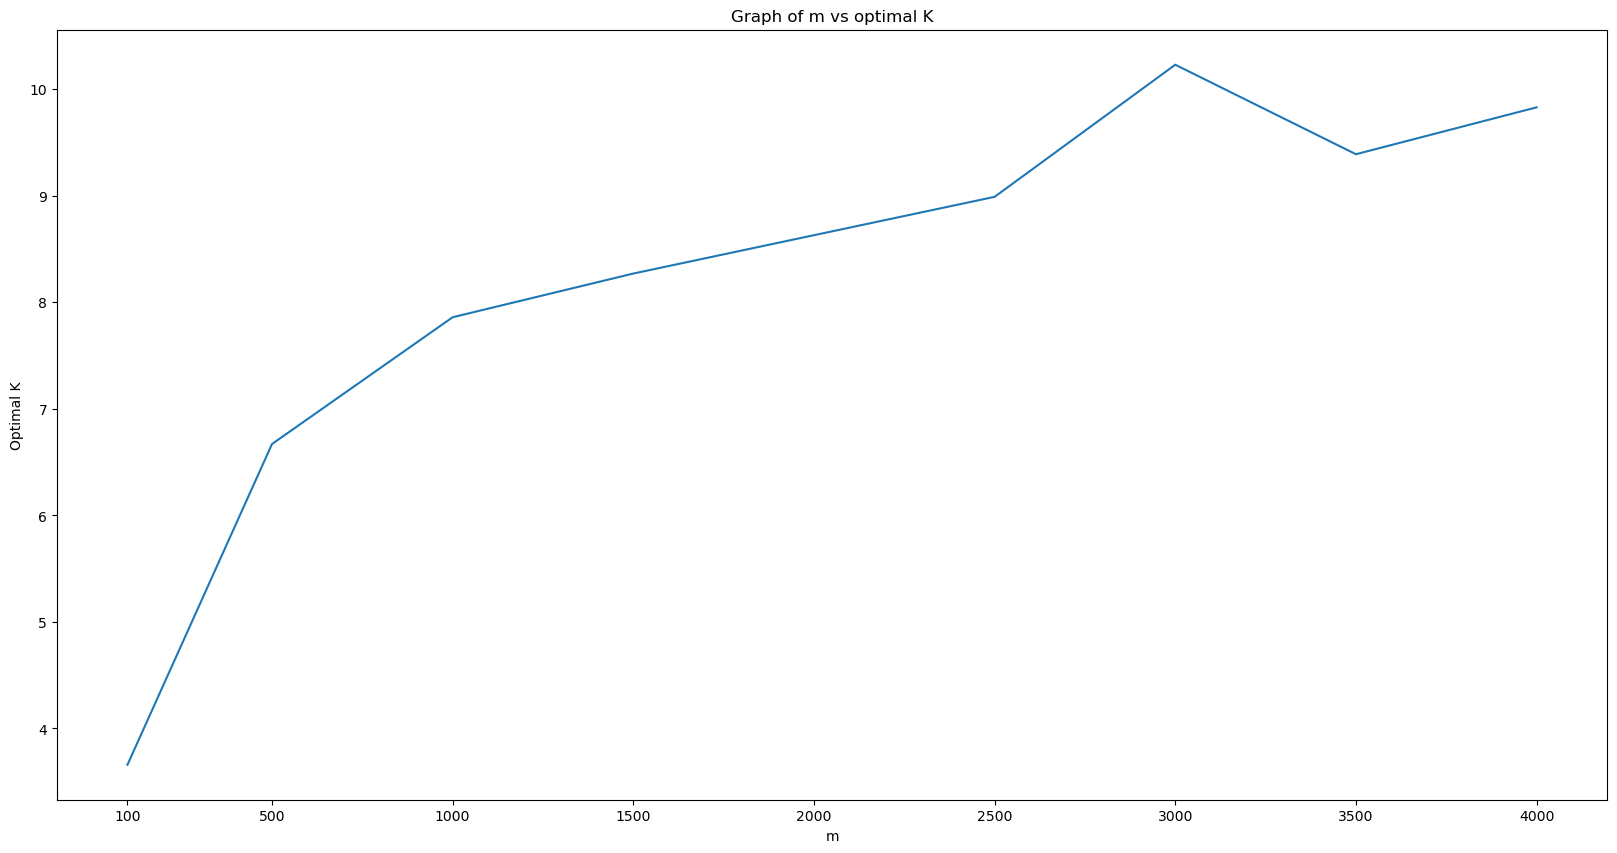

In [487]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(req['m'],req['k'])
plt.xlabel('m')
plt.ylabel('Optimal K')
plt.title('Graph of m vs optimal K')
ax.set_xticks(req['m'])
plt.show()
fig.savefig('protocolB_')